In [174]:
import numpy as np
data = np.load("exercise1.npz")
XA1 = data['XA1']
yA1 = data['yA1']
XA2 = data['XA2']
yA2 = data['yA2']

XB1 = data['XB1']
yB1 = data['yB1']
XB2 = data['XB2']
yB2 = data['yB2']
data.close()

In [199]:
from sklearn import linear_model
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score


def evaluate_performance(X,y,cv_):
    reg = linear_model.LinearRegression()
    cv_results = cross_validate(reg, X, y, cv=cv_, scoring=('r2','neg_mean_squared_error'))
    sorted(cv_results.keys())
    ['fit_time', 'score_time', 'test_score']
    test_mean_squared_error = -np.mean(cv_results['test_neg_mean_squared_error'])
    test_r2 = np.mean(cv_results['test_r2'])
    return test_mean_squared_error, test_r2



In [252]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def random_forest_feature_selection(X, y, nr_ests = 10):
    rf = RandomForestRegressor(n_estimators = nr_ests, max_depth = 5, min_samples_leaf = 5)
    rf.fit(X, y)
    feature_importance = rf.feature_importances_
    sorted_features = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k])
    #sorted_features = sorted_features.reverse()
    return sorted_features

In [724]:
def filtering(X):
    variance = np.var(X,axis=0)
    sorted_indices = np.argsort(variance) 
    return list(sorted_indices)

In [518]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

def sequential_feature_selector(X,y,nrFeatures,forward_):
    nrFeatures_left = nrFeatures if forward_ else 1
    lr = LinearRegression()
    sfs = SFS(lr, 
              k_features=nrFeatures_left, 
              forward=forward_, 
              floating=False, 
              scoring='neg_mean_squared_error',
              cv=10)
    sfs = sfs.fit(X, y)
    #features = sfs.subsets_[nrFeatures].get("feature_idx", "")
    features = []
    for i in range(1,nrFeatures): 
        perv_features = list(sfs.subsets_[i].get("feature_idx", ""))
        these_features = list(sfs.subsets_[i+1].get("feature_idx", ""))
        #print(perv_features)
        #print(these_features)
        next_feature = [x for x in these_features if x not in perv_features]
        #print(next_feature)
        features.append(next_feature[0])
        #print(features)
    return features


In [614]:
from sklearn.linear_model import ElasticNet as ELN
import numpy as np

def elastic_net(X,y, Alpha, ratio = 0.5):
    coef = []
    #ratio = l1_r
    #Alpha = np.linspace(start,end,steps)#np.logspace(0.1, 0.01, num=10)
    for a in Alpha:
        reg = ELN(alpha=a, copy_X=True, fit_intercept=True, l1_ratio=ratio,
              max_iter=1000, normalize=False, positive=False, precompute=False,
              random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
        reg.fit(X, y) 
        coef.append(reg.coef_.tolist())
    return np.array(coef)

In [742]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

def perform_pca(X, nrFeatures):
    pca = PCA(n_components=nrFeatures)
    pca.fit(X) 
    pca_data = pca.fit_transform(X)
    return pca_data

In [769]:
from sklearn.utils.extmath import randomized_svd as svd
from numpy.linalg import qr

X = XA1
q, r = qr(X)
t = np.dot(q.T,X)
u0, s, v = svd(t, 5, n_oversamples=10)
u = np.dot(q, u0)
X_new = u*s*v
pprint(X_new)


ValueError: operands could not be broadcast together with shapes (100,5) (5,10) 

In [747]:
xData = XA1
yData = yA1
step = 10

nrFeatures = xData.shape[1]

performance_random_forest = []
performance_step_for = []
performance_step_back = []
performance_pca = []
performance_filter = []

random_forest_features = random_forest_feature_selection(xData, yData, nr_ests = 100)[::-1]
print('forest')
pca_features = perform_pca(xData, nrFeatures)
print('pca')
#step_for_features = sequential_feature_selector(xData,yData,nrFeatures,True)
#print('forward')
#step_back_features =  sequential_feature_selector(xData,yData,nrFeatures,False)
#print('backward')
filter_features = filtering(xData)
print('filter')

for i in range(1,nrFeatures, step):
    forest_features_i = random_forest_features[:i]
    #step_for_features_i = step_for_features[:i]
    #step_back_features_i = step_back_features[:i]
    pca_data_i = [feature[:i] for feature in pca_features]
    filter_features_i = filter_features[:i]
    
    performance_random_forest.append(evaluate_performance(xData[:,forest_features_i],yData,10))
    #performance_step_for.append(evaluate_performance(xData[:,step_for_features_i],yData,10))
    #performance_step_back.append(evaluate_performance(xData[:,step_back_features_i],yData,10))
    performance_pca.append(evaluate_performance(pca_data_i,yData,10))
    performance_filter.append(evaluate_performance(xData[:,filter_features_i],yData,10))

forest
pca
filter


In [740]:
step = 1
nrFeatures = 50
performance_random_forest = []
performance_step_for = []
performance_step_back = []
performance_pca = []
performance_filter = []
for i in range(1,nrFeatures, step):
    forest_features_i = random_forest_features[:i]
    #step_for_features_i = step_for_features[:i]
    #step_back_features_i = step_back_features[:i]
    pca_data_i = [feature[:i] for feature in pca_features]
    filter_features_i = filter_features[:i]
    
    performance_random_forest.append(evaluate_performance(xData[:,forest_features_i],yData,10))
    #performance_step_for.append(evaluate_performance(xData[:,step_for_features_i],yData,10))
    #performance_step_back.append(evaluate_performance(xData[:,step_back_features_i],yData,10))
    performance_pca.append(evaluate_performance(pca_data_i,yData,10))
    performance_filter.append(evaluate_performance(xData[:,filter_features_i],yData,10))
    
print(performance_filter)

[(3.1757633031990435, -0.006904904629983477), (3.1767818434832966, -0.007260878678679939), (3.1776188778403003, -0.006972542315447805), (3.1802502659061727, -0.008167007750160549), (3.180526508229895, -0.008306537097292899), (3.1794187338259445, -0.00947346146986181), (3.18075219009888, -0.009150029920676716), (3.1818836960167416, -0.009305357216544574), (3.1830053176120474, -0.009676001224768537), (3.192796209354773, -0.01262571391192877), (3.181765843119641, -0.009398518967023895), (3.1903639521284077, -0.012189806796658431), (3.195557623210948, -0.013690522420402685), (3.199124172246049, -0.013707227345676054), (3.2050118022938356, -0.015643696767361548), (3.2058178624089315, -0.01613675783937827), (3.209687277067226, -0.017368549145882584), (3.214458737674312, -0.01872868070814866), (3.2194316289570986, -0.019663911387106235), (3.2250386646198654, -0.020942830761890862), (3.235956126853374, -0.024261004865974024), (3.2527694366486903, -0.029541417998770747), (3.2573454824632604, -0

C:\Users\ErikF\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 432x288 with 0 Axes>

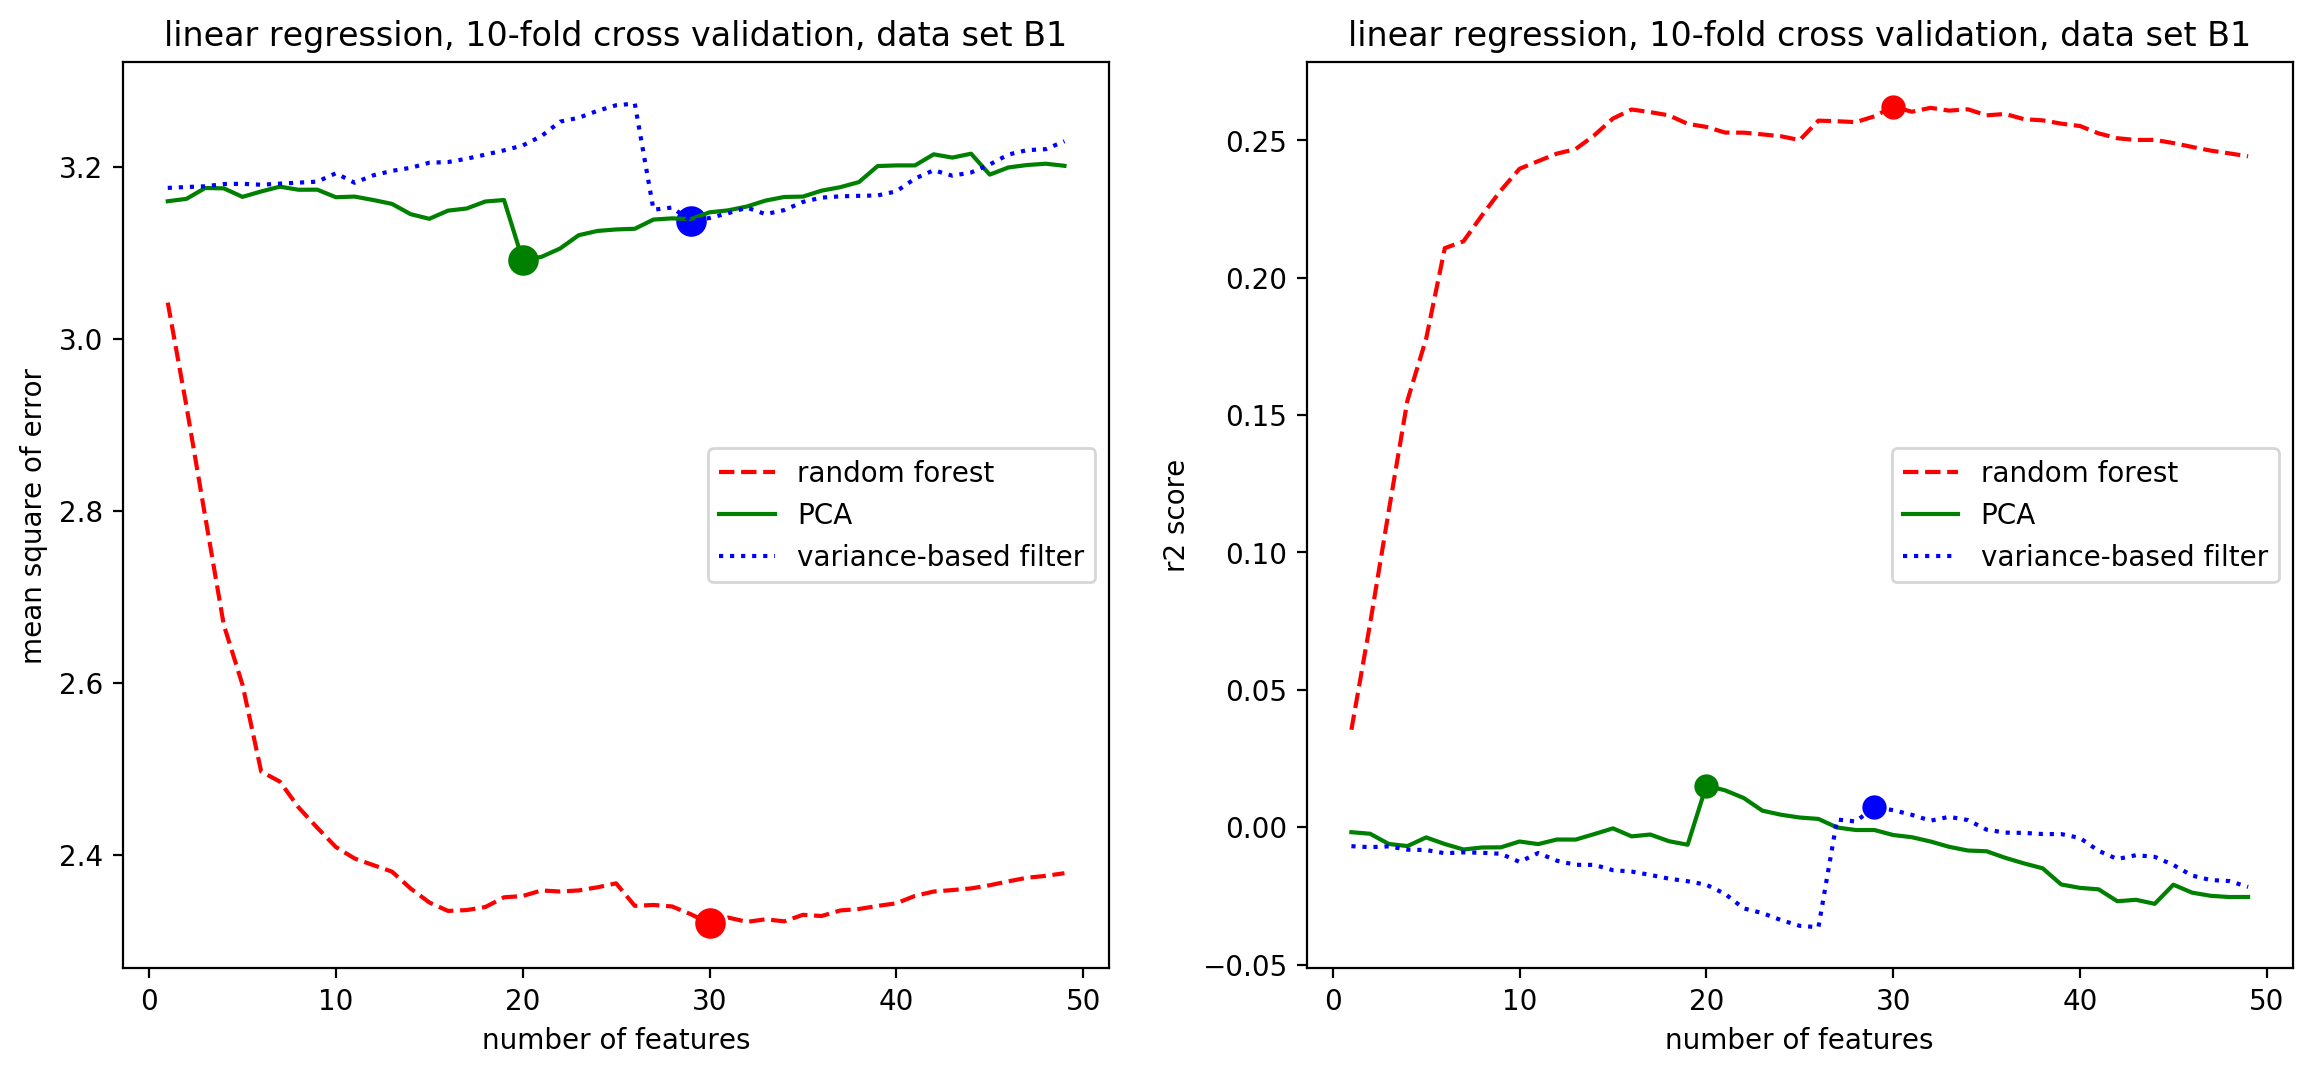

In [741]:
import matplotlib.pyplot as plt
import numpy as np

performances = [performance_random_forest, performance_pca, performance_filter]
col = ['r', 'g', 'b', 'm']
linestyles = ['--', '-', ':', '-.']
show_line = True


plt.clf()
plt.figure(num=None, figsize=(14, 6), dpi=200, facecolor='w', edgecolor='k')
for i,performance in enumerate(performances):
    mse = [i[0] for i in performance]
    r2 = [i[1] for i in performance]
    #print(performance)
    plt.subplot(1,2,1)
    plt.plot(range(1,nrFeatures, step),[i[0] for i in performance], c = col[i], linestyle = linestyles[i])
    plt.title('linear regression, 10-fold cross validation, data set B1')
    plt.legend(['random forest', 'PCA', 'variance-based filter'])
    plt.xlabel('number of features')
    plt.ylabel('mean square of error')
    if show_line:
        #Min, Max = max(mse), min(mse)
        #Min, Max = Min-(Max-Min)/10, Max+(Max-Min)/10
        x,y = mse.index(min(mse))+1, min(mse)
        plt.scatter(x,y, c = col[i], s =100)

    plt.subplot(1,2,2)
    plt.plot(range(1,nrFeatures, step),[i[1] for i in performance], c = col[i], linestyle = linestyles[i])
    plt.title('linear regression, 10-fold cross validation, data set B1')
    plt.legend(['random forest', 'PCA', 'variance-based filter'])
    plt.xlabel('number of features')
    plt.ylabel('r2 score')
    if show_line:
        #Min, Max = max(r2), min(r2)
        #Min, Max = Min-(Max-Min)/10, Max+(Max-Min)/10
        x,y = r2.index(max(r2))+1, max(r2)
        plt.scatter(x,y, c = col[i], s =60)

plt.show()



800


<Figure size 432x288 with 0 Axes>

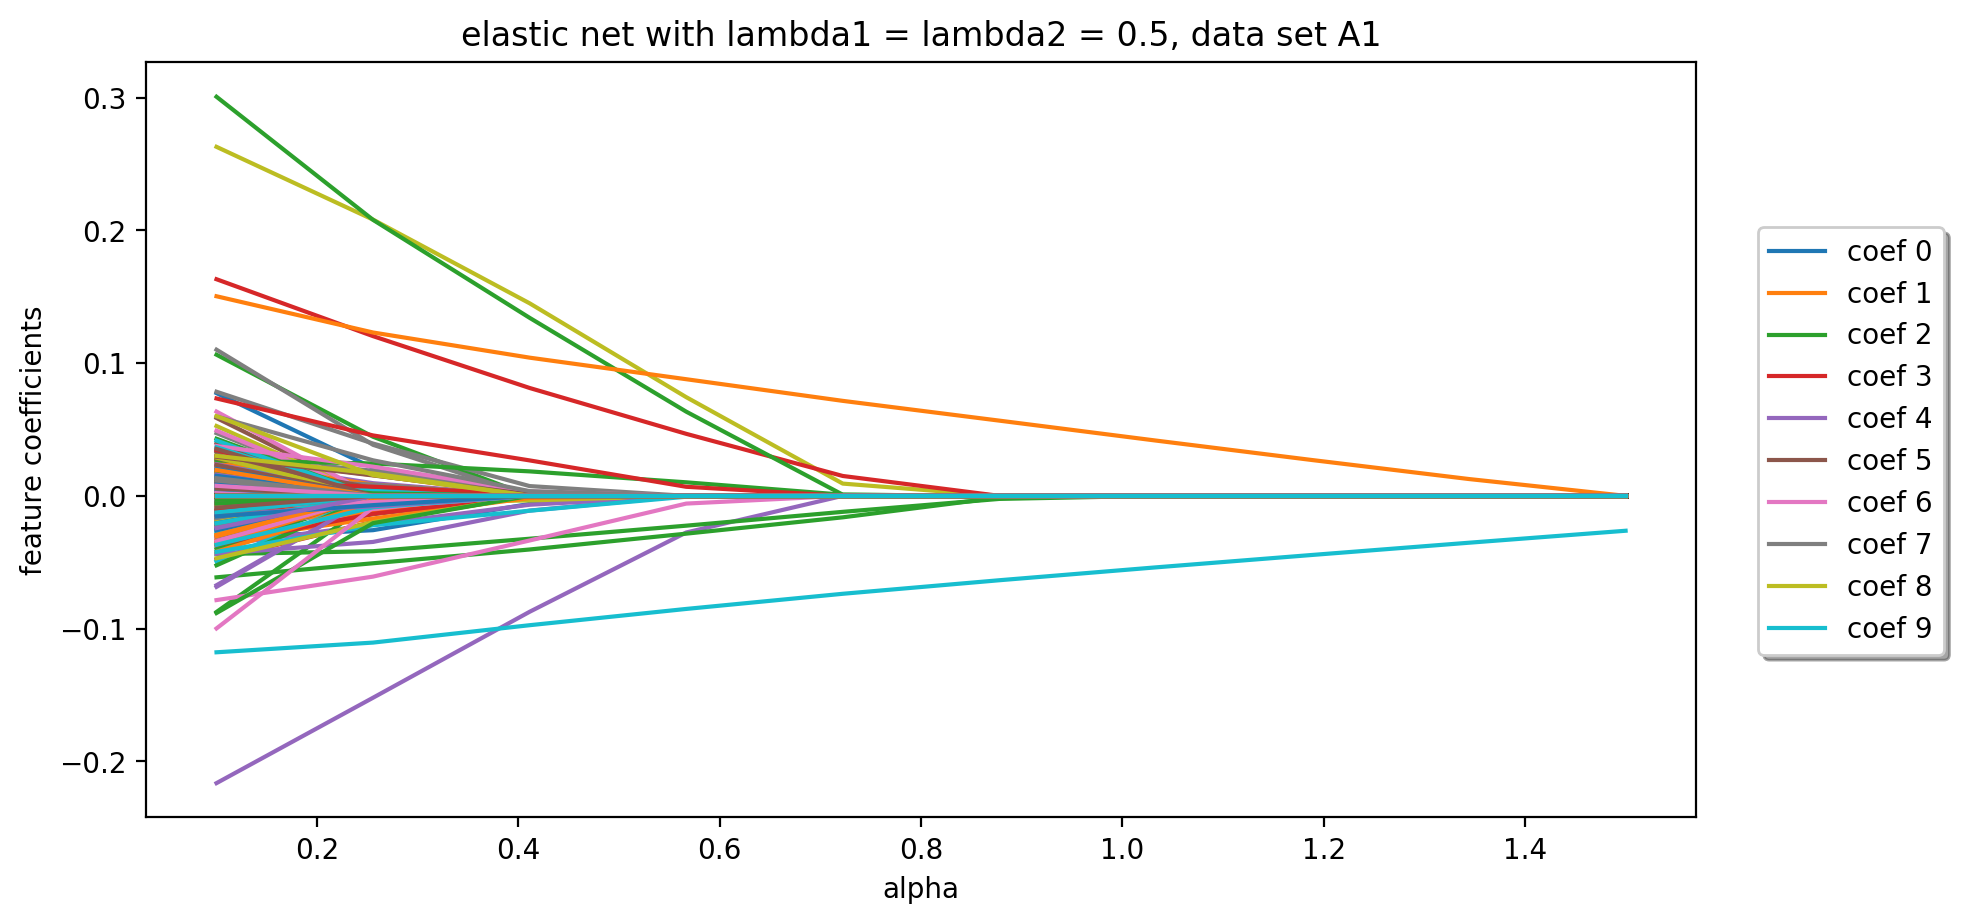

In [705]:
import matplotlib.pyplot as plt
import numpy as np

nrFeatures = xData.shape[1]
print(nrFeatures)
steps = 10
Alpha = np.linspace(0.1,1.5,steps)
coef = elastic_net(xData,yData,Alpha, 0.5)
labels = ['coef ' + str(i) for i in range(0,steps)]
#print(labels)
plt.clf()
plt.figure(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
plt.xlabel('alpha')
plt.ylabel('feature coefficients')

for i in range(nrFeatures): 
    plt.plot(Alpha,[c[i] for c in coef])
    plt.title('elastic net with lambda1 = lambda2 = 0.5, data set A1')

#plt.legend(labels)
plt.legend(labels, loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)


<Figure size 432x288 with 0 Axes>

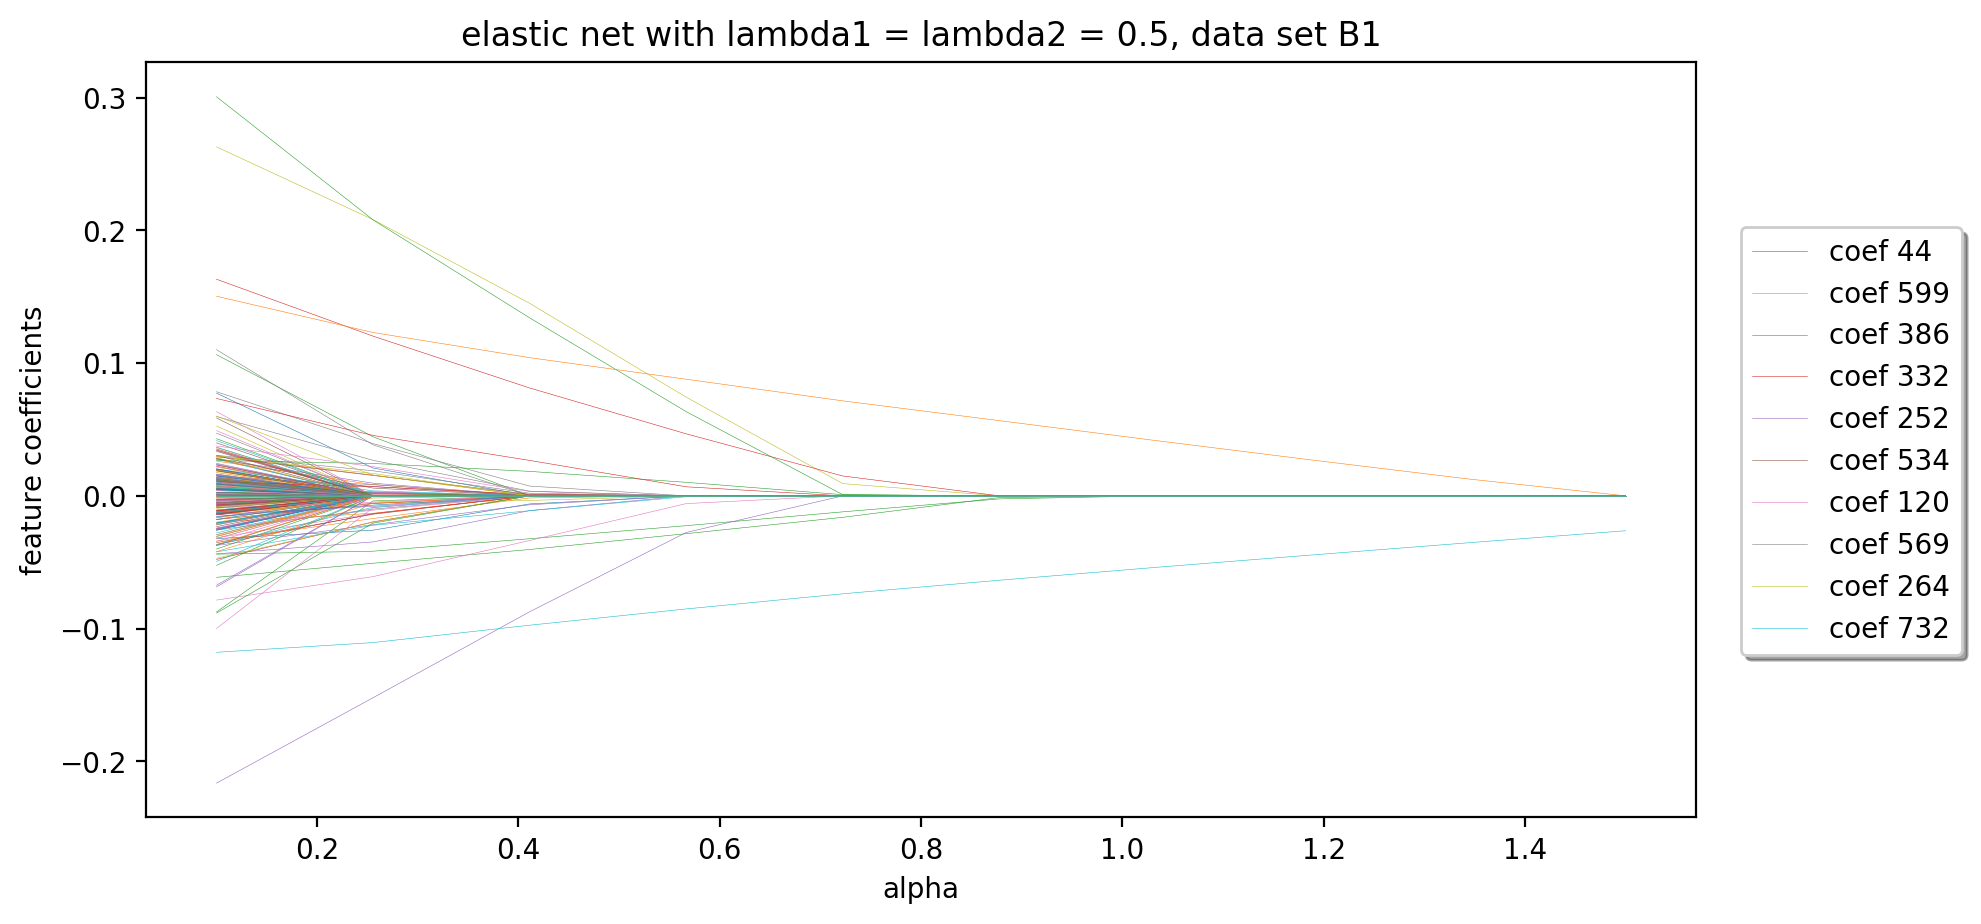

In [746]:
big_coeff = np.argsort(coef[1])[:10]

labels = ['coef ' + str(i) for i in big_coeff]
#print(labels)
plt.clf()
plt.figure(num=None, figsize=(10, 5), dpi=200, facecolor='w', edgecolor='k')
plt.xlabel('alpha')
plt.ylabel('feature coefficients')

lines = []
for i in range(nrFeatures): 
    lines.append(plt.plot(Alpha,[c[i] for c in coef], linewidth = 0.2))
    plt.title('elastic net with lambda1 = lambda2 = 0.5, data set B1')

#plt.legend(labels)
plt.legend(labels, loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1)
